In [1]:
import re
import numpy as np
import itertools
import pandas as pd
import numpy as np
import re
import os

# Drawing the embeddings
import matplotlib.pyplot as plt

# Deep learning: 
from keras.models import Input, Model
from keras.layers import Dense

from scipy import sparse

Using TensorFlow backend.


In [2]:
def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })
    print(unique_word_dict)
    return unique_word_dict    

def text_preprocessing(
    text:list,
    punctuations = r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
    stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will']
    )->list:
    """
    A method to preproces text
    """
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list 
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x!='']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text

# Functions to find the most similar word 
def euclidean(vec1:np.array, vec2:np.array) -> float:
    """
    A function to calculate the euclidean distance between two vectors
    """
    return np.sqrt(np.sum((vec1 - vec2)**2))

def find_similar(word:str, embedding_dict:dict, top_n=10)->list:
    """
    A method to find the most similar word based on the learnt embeddings
    """
    dist_dict = {}
    word_vector = embedding_dict.get(word, [])
    if len(word_vector) > 0:
        for key, value in embedding_dict.items():
            if key!=word:
                dist = euclidean(word_vector, value)
                dist_dict.update({
                    key: dist
                })

        return sorted(dist_dict.items(), key=lambda x: x[1])[0:top_n]       

In [3]:
# Custom functions
#from utility import text_preprocessing, create_unique_word_dict

# Reading the text from the input folder
texts = pd.read_csv('input/sample.csv')
texts = [x for x in texts['text']]

# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []


In [4]:

for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)
    print(text)
    # Appending to the all text list
    all_text += text 

    # Creating a context dictionary
    for i, word in enumerate(text):
        print("......i....." ,i,"....word....",word)
        for w in range(3):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])           






['future', 'king', 'prince']
......i..... 0 ....word.... future
......i..... 1 ....word.... king
......i..... 2 ....word.... prince
['daughter', 'princess']
......i..... 0 ....word.... daughter
......i..... 1 ....word.... princess
['son', 'prince']
......i..... 0 ....word.... son
......i..... 1 ....word.... prince
['only', 'man', 'can', 'king']
......i..... 0 ....word.... only
......i..... 1 ....word.... man
......i..... 2 ....word.... can
......i..... 3 ....word.... king
['only', 'woman', 'can', 'queen']
......i..... 0 ....word.... only
......i..... 1 ....word.... woman
......i..... 2 ....word.... can
......i..... 3 ....word.... queen
['princess', 'queen']
......i..... 0 ....word.... princess
......i..... 1 ....word.... queen
['queen', 'king', 'rule', 'realm']
......i..... 0 ....word.... queen
......i..... 1 ....word.... king
......i..... 2 ....word.... rule
......i..... 3 ....word.... realm
['prince', 'strong', 'man']
......i..... 0 ....word.... prince
......i..... 1 ....word.... str

In [5]:
print("word list " , word_lists)
print("===="*30)
unique_word_dict = create_unique_word_dict(all_text)
print("unique_word_dict",unique_word_dict)

word list  [['future', 'king'], ['future', 'prince'], ['king', 'prince'], ['king', 'future'], ['prince', 'king'], ['prince', 'future'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['only', 'man'], ['only', 'can'], ['only', 'king'], ['man', 'can'], ['man', 'only'], ['man', 'king'], ['can', 'king'], ['can', 'man'], ['can', 'only'], ['king', 'can'], ['king', 'man'], ['king', 'only'], ['only', 'woman'], ['only', 'can'], ['only', 'queen'], ['woman', 'can'], ['woman', 'only'], ['woman', 'queen'], ['can', 'queen'], ['can', 'woman'], ['can', 'only'], ['queen', 'can'], ['queen', 'woman'], ['queen', 'only'], ['princess', 'queen'], ['queen', 'princess'], ['queen', 'king'], ['queen', 'rule'], ['queen', 'realm'], ['king', 'rule'], ['king', 'queen'], ['king', 'realm'], ['rule', 'realm'], ['rule', 'king'], ['rule', 'queen'], ['realm', 'rule'], ['realm', 'king'], ['realm', 'queen'], ['prince', 'strong'], ['prince', 'man'], ['strong', 'man'], ['strong', 'pr

In [6]:
# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

print("words",words)



words ['beautiful', 'boy', 'can', 'children', 'daughter', 'family', 'future', 'king', 'man', 'now', 'only', 'prince', 'princess', 'queen', 'realm', 'royal', 'rule', 'son', 'strong', 'their', 'woman']


In [7]:
word_lists[0],word_lists[1]

(['future', 'king'], ['future', 'prince'])

In [8]:
# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in enumerate(word_lists):
    # Getting the indices
    
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])
    print("......i....." ,i,"....word_list....",word_list , "word_list[0]",word_list[0],"word_list[1] ",word_list[1])
    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)



......i..... 0 ....word_list.... ['future', 'king'] word_list[0] future word_list[1]  king
......i..... 1 ....word_list.... ['future', 'prince'] word_list[0] future word_list[1]  prince
......i..... 2 ....word_list.... ['king', 'prince'] word_list[0] king word_list[1]  prince
......i..... 3 ....word_list.... ['king', 'future'] word_list[0] king word_list[1]  future
......i..... 4 ....word_list.... ['prince', 'king'] word_list[0] prince word_list[1]  king
......i..... 5 ....word_list.... ['prince', 'future'] word_list[0] prince word_list[1]  future
......i..... 6 ....word_list.... ['daughter', 'princess'] word_list[0] daughter word_list[1]  princess
......i..... 7 ....word_list.... ['princess', 'daughter'] word_list[0] princess word_list[1]  daughter
......i..... 8 ....word_list.... ['son', 'prince'] word_list[0] son word_list[1]  prince
......i..... 9 ....word_list.... ['prince', 'son'] word_list[0] prince word_list[1]  son
......i..... 10 ....word_list.... ['only', 'man'] word_list[0]

In [9]:
len(X), X

(98,
 [array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.

In [10]:
len(Y),Y

(98,
 [array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [11]:
# Converting the matrices into a sparse format because the vast majority of the data are 0s
X = sparse.csr_matrix(X)
Y = sparse.csr_matrix(Y)

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)

model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [12]:
X.shape, Y.shape

((98, 21), (98, 21))

In [13]:
%%time
# Optimizing the network weights
model.fit(
    x=X, 
    y=Y, 
    batch_size=256,
    epochs=2000
    )



Epoch 1/2000
98/98 [==============================] - 0s 797us/step - loss: 3.0642
Epoch 2/2000
98/98 [==============================] - 0s 0us/step - loss: 3.0632
Epoch 3/2000
98/98 [==============================] - 0s 207us/step - loss: 3.0623
Epoch 4/2000
98/98 [==============================] - 0s 71us/step - loss: 3.0614
Epoch 5/2000
98/98 [==============================] - 0s 71us/step - loss: 3.0605
Epoch 6/2000
98/98 [==============================] - 0s 41us/step - loss: 3.0596
Epoch 7/2000
98/98 [==============================] - 0s 41us/step - loss: 3.0586
Epoch 8/2000
98/98 [==============================] - 0s 41us/step - loss: 3.0576
Epoch 9/2000
98/98 [==============================] - 0s 71us/step - loss: 3.0567
Epoch 10/2000
98/98 [==============================] - 0s 51us/step - loss: 3.0557
Epoch 11/2000
98/98 [==============================] - 0s 41us/step - loss: 3.0547
Epoch 12/2000
98/98 [==============================] - 0s 31us/step - loss: 3.0537
Epoch 13/200

Epoch 100/2000
98/98 [==============================] - 0s 61us/step - loss: 2.9703
Epoch 101/2000
98/98 [==============================] - 0s 61us/step - loss: 2.9693
Epoch 102/2000
98/98 [==============================] - 0s 61us/step - loss: 2.9683
Epoch 103/2000
98/98 [==============================] - 0s 61us/step - loss: 2.9673
Epoch 104/2000
98/98 [==============================] - 0s 61us/step - loss: 2.9663
Epoch 105/2000
98/98 [==============================] - 0s 71us/step - loss: 2.9653
Epoch 106/2000
98/98 [==============================] - 0s 61us/step - loss: 2.9643
Epoch 107/2000
98/98 [==============================] - 0s 41us/step - loss: 2.9633
Epoch 108/2000
98/98 [==============================] - 0s 61us/step - loss: 2.9623
Epoch 109/2000
98/98 [==============================] - 0s 31us/step - loss: 2.9613
Epoch 110/2000
98/98 [==============================] - 0s 41us/step - loss: 2.9603
Epoch 111/2000
98/98 [==============================] - 0s 41us/step - loss:

Epoch 198/2000
98/98 [==============================] - 0s 31us/step - loss: 2.8651
Epoch 199/2000
98/98 [==============================] - 0s 61us/step - loss: 2.8640
Epoch 200/2000
98/98 [==============================] - 0s 41us/step - loss: 2.8628
Epoch 201/2000
98/98 [==============================] - 0s 41us/step - loss: 2.8617
Epoch 202/2000
98/98 [==============================] - 0s 41us/step - loss: 2.8606
Epoch 203/2000
98/98 [==============================] - 0s 31us/step - loss: 2.8594
Epoch 204/2000
98/98 [==============================] - 0s 31us/step - loss: 2.8583
Epoch 205/2000
98/98 [==============================] - 0s 31us/step - loss: 2.8572
Epoch 206/2000
98/98 [==============================] - 0s 61us/step - loss: 2.8561
Epoch 207/2000
98/98 [==============================] - 0s 31us/step - loss: 2.8549
Epoch 208/2000
98/98 [==============================] - 0s 41us/step - loss: 2.8538
Epoch 209/2000
98/98 [==============================] - 0s 51us/step - loss:

Epoch 296/2000
98/98 [==============================] - 0s 31us/step - loss: 2.7590
Epoch 297/2000
98/98 [==============================] - 0s 41us/step - loss: 2.7580
Epoch 298/2000
98/98 [==============================] - 0s 61us/step - loss: 2.7570
Epoch 299/2000
98/98 [==============================] - 0s 31us/step - loss: 2.7560
Epoch 300/2000
98/98 [==============================] - 0s 41us/step - loss: 2.7550
Epoch 301/2000
98/98 [==============================] - 0s 31us/step - loss: 2.7540
Epoch 302/2000
98/98 [==============================] - 0s 31us/step - loss: 2.7530
Epoch 303/2000
98/98 [==============================] - 0s 31us/step - loss: 2.7521
Epoch 304/2000
98/98 [==============================] - 0s 41us/step - loss: 2.7511
Epoch 305/2000
98/98 [==============================] - 0s 51us/step - loss: 2.7501
Epoch 306/2000
98/98 [==============================] - 0s 61us/step - loss: 2.7491
Epoch 307/2000
98/98 [==============================] - 0s 51us/step - loss:

Epoch 394/2000
98/98 [==============================] - 0s 51us/step - loss: 2.6691
Epoch 395/2000
98/98 [==============================] - 0s 41us/step - loss: 2.6682
Epoch 396/2000
98/98 [==============================] - 0s 41us/step - loss: 2.6674
Epoch 397/2000
98/98 [==============================] - 0s 51us/step - loss: 2.6666
Epoch 398/2000
98/98 [==============================] - 0s 31us/step - loss: 2.6658
Epoch 399/2000
98/98 [==============================] - 0s 31us/step - loss: 2.6649
Epoch 400/2000
98/98 [==============================] - 0s 61us/step - loss: 2.6641
Epoch 401/2000
98/98 [==============================] - 0s 41us/step - loss: 2.6633
Epoch 402/2000
98/98 [==============================] - 0s 41us/step - loss: 2.6625
Epoch 403/2000
98/98 [==============================] - 0s 41us/step - loss: 2.6617
Epoch 404/2000
98/98 [==============================] - 0s 31us/step - loss: 2.6609
Epoch 405/2000
98/98 [==============================] - 0s 41us/step - loss:

Epoch 492/2000
98/98 [==============================] - 0s 31us/step - loss: 2.5961
Epoch 493/2000
98/98 [==============================] - 0s 51us/step - loss: 2.5955
Epoch 494/2000
98/98 [==============================] - 0s 41us/step - loss: 2.5948
Epoch 495/2000
98/98 [==============================] - 0s 41us/step - loss: 2.5942
Epoch 496/2000
98/98 [==============================] - 0s 31us/step - loss: 2.5935
Epoch 497/2000
98/98 [==============================] - 0s 51us/step - loss: 2.5928
Epoch 498/2000
98/98 [==============================] - 0s 92us/step - loss: 2.5922
Epoch 499/2000
98/98 [==============================] - 0s 51us/step - loss: 2.5916
Epoch 500/2000
98/98 [==============================] - 0s 61us/step - loss: 2.5909
Epoch 501/2000
98/98 [==============================] - 0s 31us/step - loss: 2.5903
Epoch 502/2000
98/98 [==============================] - 0s 51us/step - loss: 2.5896
Epoch 503/2000
98/98 [==============================] - 0s 61us/step - loss:

Epoch 590/2000
98/98 [==============================] - 0s 82us/step - loss: 2.5387
Epoch 591/2000
98/98 [==============================] - 0s 71us/step - loss: 2.5382
Epoch 592/2000
98/98 [==============================] - 0s 71us/step - loss: 2.5377
Epoch 593/2000
98/98 [==============================] - 0s 82us/step - loss: 2.5371
Epoch 594/2000
98/98 [==============================] - 0s 41us/step - loss: 2.5366
Epoch 595/2000
98/98 [==============================] - 0s 51us/step - loss: 2.5361
Epoch 596/2000
98/98 [==============================] - 0s 51us/step - loss: 2.5356
Epoch 597/2000
98/98 [==============================] - 0s 61us/step - loss: 2.5351
Epoch 598/2000
98/98 [==============================] - 0s 51us/step - loss: 2.5346
Epoch 599/2000
98/98 [==============================] - 0s 71us/step - loss: 2.5341
Epoch 600/2000
98/98 [==============================] - 0s 31us/step - loss: 2.5336
Epoch 601/2000
98/98 [==============================] - 0s 51us/step - loss:

Epoch 688/2000
98/98 [==============================] - 0s 51us/step - loss: 2.4930
Epoch 689/2000
98/98 [==============================] - 0s 41us/step - loss: 2.4926
Epoch 690/2000
98/98 [==============================] - 0s 41us/step - loss: 2.4922
Epoch 691/2000
98/98 [==============================] - 0s 61us/step - loss: 2.4918
Epoch 692/2000
98/98 [==============================] - 0s 41us/step - loss: 2.4913
Epoch 693/2000
98/98 [==============================] - 0s 51us/step - loss: 2.4909
Epoch 694/2000
98/98 [==============================] - 0s 41us/step - loss: 2.4905
Epoch 695/2000
98/98 [==============================] - 0s 41us/step - loss: 2.4901
Epoch 696/2000
98/98 [==============================] - 0s 51us/step - loss: 2.4897
Epoch 697/2000
98/98 [==============================] - 0s 41us/step - loss: 2.4893
Epoch 698/2000
98/98 [==============================] - 0s 61us/step - loss: 2.4889
Epoch 699/2000
98/98 [==============================] - 0s 51us/step - loss:

Epoch 786/2000
98/98 [==============================] - 0s 51us/step - loss: 2.4558
Epoch 787/2000
98/98 [==============================] - 0s 41us/step - loss: 2.4554
Epoch 788/2000
98/98 [==============================] - 0s 51us/step - loss: 2.4551
Epoch 789/2000
98/98 [==============================] - 0s 71us/step - loss: 2.4547
Epoch 790/2000
98/98 [==============================] - 0s 41us/step - loss: 2.4544
Epoch 791/2000
98/98 [==============================] - 0s 61us/step - loss: 2.4541
Epoch 792/2000
98/98 [==============================] - 0s 41us/step - loss: 2.4537
Epoch 793/2000
98/98 [==============================] - 0s 51us/step - loss: 2.4534
Epoch 794/2000
98/98 [==============================] - 0s 51us/step - loss: 2.4530
Epoch 795/2000
98/98 [==============================] - 0s 41us/step - loss: 2.4527
Epoch 796/2000
98/98 [==============================] - 0s 31us/step - loss: 2.4523
Epoch 797/2000
98/98 [==============================] - 0s 51us/step - loss:

Epoch 884/2000
98/98 [==============================] - 0s 31us/step - loss: 2.4243
Epoch 885/2000
98/98 [==============================] - 0s 41us/step - loss: 2.4240
Epoch 886/2000
98/98 [==============================] - 0s 51us/step - loss: 2.4237
Epoch 887/2000
98/98 [==============================] - 0s 41us/step - loss: 2.4234
Epoch 888/2000
98/98 [==============================] - 0s 51us/step - loss: 2.4231
Epoch 889/2000
98/98 [==============================] - 0s 51us/step - loss: 2.4228
Epoch 890/2000
98/98 [==============================] - 0s 31us/step - loss: 2.4225
Epoch 891/2000
98/98 [==============================] - 0s 41us/step - loss: 2.4222
Epoch 892/2000
98/98 [==============================] - 0s 41us/step - loss: 2.4219
Epoch 893/2000
98/98 [==============================] - 0s 61us/step - loss: 2.4216
Epoch 894/2000
98/98 [==============================] - 0s 31us/step - loss: 2.4214
Epoch 895/2000
98/98 [==============================] - 0s 31us/step - loss:

Epoch 982/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3964
Epoch 983/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3962
Epoch 984/2000
98/98 [==============================] - 0s 31us/step - loss: 2.3959
Epoch 985/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3956
Epoch 986/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3954
Epoch 987/2000
98/98 [==============================] - 0s 51us/step - loss: 2.3951
Epoch 988/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3948
Epoch 989/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3945
Epoch 990/2000
98/98 [==============================] - 0s 51us/step - loss: 2.3943
Epoch 991/2000
98/98 [==============================] - 0s 51us/step - loss: 2.3940
Epoch 992/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3937
Epoch 993/2000
98/98 [==============================] - 0s 31us/step - loss:

Epoch 1079/2000
98/98 [==============================] - 0s 31us/step - loss: 2.3708
Epoch 1080/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3705
Epoch 1081/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3702
Epoch 1082/2000
98/98 [==============================] - 0s 31us/step - loss: 2.3700
Epoch 1083/2000
98/98 [==============================] - 0s 51us/step - loss: 2.3697
Epoch 1084/2000
98/98 [==============================] - 0s 61us/step - loss: 2.3695
Epoch 1085/2000
98/98 [==============================] - 0s 31us/step - loss: 2.3692
Epoch 1086/2000
98/98 [==============================] - 0s 31us/step - loss: 2.3689
Epoch 1087/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3687
Epoch 1088/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3684
Epoch 1089/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3682
Epoch 1090/2000
98/98 [==============================] - 0s 20us/

Epoch 1176/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3461
Epoch 1177/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3458
Epoch 1178/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3456
Epoch 1179/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3453
Epoch 1180/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3451
Epoch 1181/2000
98/98 [==============================] - 0s 31us/step - loss: 2.3448
Epoch 1182/2000
98/98 [==============================] - 0s 51us/step - loss: 2.3446
Epoch 1183/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3443
Epoch 1184/2000
98/98 [==============================] - 0s 31us/step - loss: 2.3441
Epoch 1185/2000
98/98 [==============================] - 0s 20us/step - loss: 2.3438
Epoch 1186/2000
98/98 [==============================] - 0s 31us/step - loss: 2.3436
Epoch 1187/2000
98/98 [==============================] - 0s 61us/

Epoch 1273/2000
98/98 [==============================] - 0s 31us/step - loss: 2.3225
Epoch 1274/2000
98/98 [==============================] - 0s 31us/step - loss: 2.3222
Epoch 1275/2000
98/98 [==============================] - 0s 61us/step - loss: 2.3220
Epoch 1276/2000
98/98 [==============================] - 0s 31us/step - loss: 2.3218
Epoch 1277/2000
98/98 [==============================] - 0s 31us/step - loss: 2.3215
Epoch 1278/2000
98/98 [==============================] - 0s 51us/step - loss: 2.3213
Epoch 1279/2000
98/98 [==============================] - 0s 31us/step - loss: 2.3211
Epoch 1280/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3208
Epoch 1281/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3206
Epoch 1282/2000
98/98 [==============================] - 0s 61us/step - loss: 2.3204
Epoch 1283/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3201
Epoch 1284/2000
98/98 [==============================] - 0s 51us/

Epoch 1370/2000
98/98 [==============================] - 0s 31us/step - loss: 2.3006
Epoch 1371/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3004
Epoch 1372/2000
98/98 [==============================] - 0s 41us/step - loss: 2.3001
Epoch 1373/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2999
Epoch 1374/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2997
Epoch 1375/2000
98/98 [==============================] - 0s 31us/step - loss: 2.2995
Epoch 1376/2000
98/98 [==============================] - 0s 31us/step - loss: 2.2993
Epoch 1377/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2991
Epoch 1378/2000
98/98 [==============================] - 0s 31us/step - loss: 2.2989
Epoch 1379/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2987
Epoch 1380/2000
98/98 [==============================] - 0s 31us/step - loss: 2.2984
Epoch 1381/2000
98/98 [==============================] - 0s 51us/

Epoch 1467/2000
98/98 [==============================] - 0s 82us/step - loss: 2.2810
Epoch 1468/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2808
Epoch 1469/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2807
Epoch 1470/2000
98/98 [==============================] - 0s 61us/step - loss: 2.2805
Epoch 1471/2000
98/98 [==============================] - 0s 61us/step - loss: 2.2803
Epoch 1472/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2801
Epoch 1473/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2799
Epoch 1474/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2797
Epoch 1475/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2795
Epoch 1476/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2793
Epoch 1477/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2792
Epoch 1478/2000
98/98 [==============================] - 0s 41us/

Epoch 1564/2000
98/98 [==============================] - 0s 31us/step - loss: 2.2640
Epoch 1565/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2639
Epoch 1566/2000
98/98 [==============================] - 0s 71us/step - loss: 2.2637
Epoch 1567/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2635
Epoch 1568/2000
98/98 [==============================] - 0s 102us/step - loss: 2.2634
Epoch 1569/2000
98/98 [==============================] - 0s 61us/step - loss: 2.2632
Epoch 1570/2000
98/98 [==============================] - 0s 61us/step - loss: 2.2630
Epoch 1571/2000
98/98 [==============================] - 0s 61us/step - loss: 2.2629
Epoch 1572/2000
98/98 [==============================] - 0s 82us/step - loss: 2.2627
Epoch 1573/2000
98/98 [==============================] - 0s 71us/step - loss: 2.2626
Epoch 1574/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2624
Epoch 1575/2000
98/98 [==============================] - 0s 82us

Epoch 1661/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2494
Epoch 1662/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2492
Epoch 1663/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2491
Epoch 1664/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2490
Epoch 1665/2000
98/98 [==============================] - 0s 31us/step - loss: 2.2488
Epoch 1666/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2487
Epoch 1667/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2485
Epoch 1668/2000
98/98 [==============================] - 0s 31us/step - loss: 2.2484
Epoch 1669/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2483
Epoch 1670/2000
98/98 [==============================] - 0s 31us/step - loss: 2.2481
Epoch 1671/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2480
Epoch 1672/2000
98/98 [==============================] - 0s 31us/

Epoch 1758/2000
98/98 [==============================] - 0s 92us/step - loss: 2.2368
Epoch 1759/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2367
Epoch 1760/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2366
Epoch 1761/2000
98/98 [==============================] - 0s 61us/step - loss: 2.2365
Epoch 1762/2000
98/98 [==============================] - 0s 61us/step - loss: 2.2363
Epoch 1763/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2362
Epoch 1764/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2361
Epoch 1765/2000
98/98 [==============================] - 0s 71us/step - loss: 2.2360
Epoch 1766/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2359
Epoch 1767/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2358
Epoch 1768/2000
98/98 [==============================] - 0s 61us/step - loss: 2.2356
Epoch 1769/2000
98/98 [==============================] - 0s 41us/

Epoch 1855/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2261
Epoch 1856/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2260
Epoch 1857/2000
98/98 [==============================] - 0s 71us/step - loss: 2.2259
Epoch 1858/2000
98/98 [==============================] - 0s 61us/step - loss: 2.2258
Epoch 1859/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2257
Epoch 1860/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2256
Epoch 1861/2000
98/98 [==============================] - 0s 61us/step - loss: 2.2255
Epoch 1862/2000
98/98 [==============================] - 0s 61us/step - loss: 2.2254
Epoch 1863/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2253
Epoch 1864/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2252
Epoch 1865/2000
98/98 [==============================] - 0s 61us/step - loss: 2.2251
Epoch 1866/2000
98/98 [==============================] - 0s 41us/

Epoch 1952/2000
98/98 [==============================] - 0s 61us/step - loss: 2.2171
Epoch 1953/2000
98/98 [==============================] - 0s 71us/step - loss: 2.2170
Epoch 1954/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2170
Epoch 1955/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2169
Epoch 1956/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2168
Epoch 1957/2000
98/98 [==============================] - 0s 41us/step - loss: 2.2167
Epoch 1958/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2166
Epoch 1959/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2165
Epoch 1960/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2165
Epoch 1961/2000
98/98 [==============================] - 0s 51us/step - loss: 2.2164
Epoch 1962/2000
98/98 [==============================] - 0s 31us/step - loss: 2.2163
Epoch 1963/2000
98/98 [==============================] - 0s 41us/

Cannot create output folder: [WinError 183] Cannot create a file when that file already exists: 'G:\\Smita\\DailyLotus\\Code\\DL\\NLP\\_Start+here\\word embedding\\output'


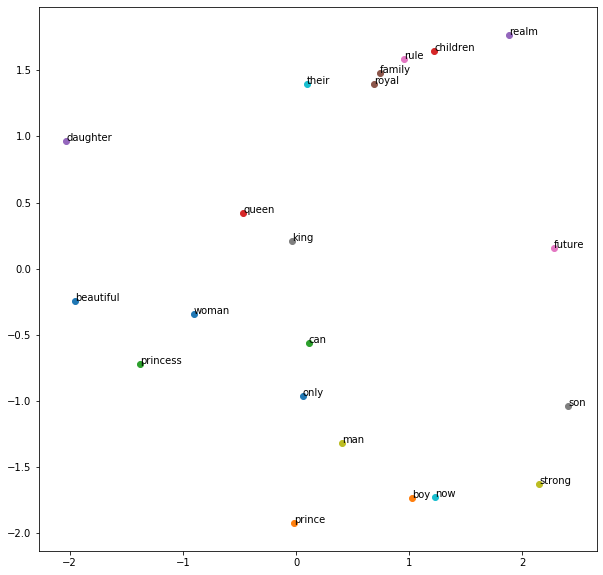

In [14]:
# Obtaining the weights from the neural network. 
# These are the so called word embeddings

# The input layer 
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
# vector representation of data

embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

# Ploting the embeddings
plt.figure(figsize=(10, 10))
for word in list(unique_word_dict.keys()):
    
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))       

# Saving the embedding vector to a txt file
try:
    os.mkdir(f'{os.getcwd()}\\output')        
except Exception as e:
    print(f'Cannot create output folder: {e}')

with open(f'{os.getcwd()}\\output\\embedding.txt', 'w') as f:
    for key, value in embedding_dict.items():
        try:
            f.write(f'{key}: {value}\n')   
        except Exception as e:
            print(f'Cannot write word {key} to dict: {e}') 

In [15]:
embedding_dict

{'beautiful': array([-1.9504333, -0.2465899], dtype=float32),
 'boy': array([ 1.027148, -1.736068], dtype=float32),
 'can': array([ 0.11085089, -0.5615232 ], dtype=float32),
 'children': array([1.2219484, 1.6461304], dtype=float32),
 'daughter': array([-2.0316696 ,  0.96772003], dtype=float32),
 'family': array([0.7415778, 1.4808642], dtype=float32),
 'future': array([2.2784812 , 0.15900773], dtype=float32),
 'king': array([-0.03503744,  0.21260273], dtype=float32),
 'man': array([ 0.40759128, -1.316172  ], dtype=float32),
 'now': array([ 1.2304033, -1.7286259], dtype=float32),
 'only': array([ 0.05827993, -0.9649529 ], dtype=float32),
 'prince': array([-0.0163816, -1.9243841], dtype=float32),
 'princess': array([-1.3762752, -0.7214183], dtype=float32),
 'queen': array([-0.46479535,  0.42215025], dtype=float32),
 'realm': array([1.8853592, 1.7683997], dtype=float32),
 'royal': array([0.68514913, 1.3963559 ], dtype=float32),
 'rule': array([0.95522106, 1.5850064 ], dtype=float32),
 'son

In [16]:
model.get_weights()[0]

array([[-1.9504333 , -0.2465899 ],
       [ 1.027148  , -1.736068  ],
       [ 0.11085089, -0.5615232 ],
       [ 1.2219484 ,  1.6461304 ],
       [-2.0316696 ,  0.96772003],
       [ 0.7415778 ,  1.4808642 ],
       [ 2.2784812 ,  0.15900773],
       [-0.03503744,  0.21260273],
       [ 0.40759128, -1.316172  ],
       [ 1.2304033 , -1.7286259 ],
       [ 0.05827993, -0.9649529 ],
       [-0.0163816 , -1.9243841 ],
       [-1.3762752 , -0.7214183 ],
       [-0.46479535,  0.42215025],
       [ 1.8853592 ,  1.7683997 ],
       [ 0.68514913,  1.3963559 ],
       [ 0.95522106,  1.5850064 ],
       [ 2.4048035 , -1.0365468 ],
       [ 2.145261  , -1.626085  ],
       [ 0.09701138,  1.3972595 ],
       [-0.904231  , -0.34038123]], dtype=float32)

In [17]:
X.shape[1]

21

In [18]:
Y.shape[1]

21

In [19]:
n_words

21

In [20]:
unique_word_dict

{'beautiful': 0,
 'boy': 1,
 'can': 2,
 'children': 3,
 'daughter': 4,
 'family': 5,
 'future': 6,
 'king': 7,
 'man': 8,
 'now': 9,
 'only': 10,
 'prince': 11,
 'princess': 12,
 'queen': 13,
 'realm': 14,
 'royal': 15,
 'rule': 16,
 'son': 17,
 'strong': 18,
 'their': 19,
 'woman': 20}

In [21]:
len(word_lists)

98

In [22]:
[['future', 'king'], ['future', 'prince'], ['king', 'prince'], ['king', 'future'], 
  ['prince', 'king'], ['prince', 'future'], ['daughter', 'princess'], ['princess', 'daughter'],
  ['son', 'prince'], ['prince', 'son'], ['only', 'man'], ['only', 'can'], ['only', 'king'], ['man', 'can'],
  ['man', 'only'], ['man', 'king'], ['can', 'king'], ['can', 'man'], ['can', 'only'], ['king', 'can'], ['king', 'man'],
  ['king', 'only'], ['only', 'woman'], ['only', 'can'], ['only', 'queen'], ['woman', 'can'], ['woman', 'only'], 
  ['woman', 'queen'], ['can', 'queen'], ['can', 'woman'], ['can', 'only'], ['queen', 'can'], ['queen', 'woman'], 
  ['queen', 'only'], ['princess', 'queen'], ['queen', 'princess'], ['queen', 'king'], ['queen', 'rule'],
  ['queen', 'realm'], ['king', 'rule'], ['king', 'queen'], ['king', 'realm'], ['rule', 'realm'], 
  ['rule', 'king'], ['rule', 'queen'], ['realm', 'rule'], ['realm', 'king'], ['realm', 'queen'], ['prince', 'strong'], 
  ['prince', 'man'], ['strong', 'man'], ['strong', 'prince'], ['man', 'strong'], ['man', 'prince'], 
  ['princess', 'beautiful'], ['princess', 'woman'], ['beautiful', 'woman'], ['beautiful', 'princess'],
  ['woman', 'beautiful'], ['woman', 'princess'], ['royal', 'family'], ['royal', 'king'], ['royal', 'queen'], 
  ['family', 'king'], ['family', 'royal'], ['family', 'queen'], ['family', 'their'], ['king', 'queen'], 
  ['king', 'family'], ['king', 'their'], ['king', 'royal'], ['king', 'children'], ['queen', 'their'], ['queen', 'king'],
  ['queen', 'children'], ['queen', 'family'], ['queen', 'royal'], ['their', 'children'], ['their', 'queen'],
  ['their', 'king'], ['their', 'family'], ['children', 'their'], ['children', 'queen'], ['children', 'king'],
  ['prince', 'only'], ['prince', 'boy'], ['prince', 'now'], ['only', 'boy'], ['only', 'prince'], ['only', 'now'],
  ['boy', 'now'], ['boy', 'only'], ['boy', 'prince'], ['now', 'boy'], ['now', 'only'], ['now', 'prince'], 
  ['boy', 'man'], ['man', 'boy']]

[['future', 'king'],
 ['future', 'prince'],
 ['king', 'prince'],
 ['king', 'future'],
 ['prince', 'king'],
 ['prince', 'future'],
 ['daughter', 'princess'],
 ['princess', 'daughter'],
 ['son', 'prince'],
 ['prince', 'son'],
 ['only', 'man'],
 ['only', 'can'],
 ['only', 'king'],
 ['man', 'can'],
 ['man', 'only'],
 ['man', 'king'],
 ['can', 'king'],
 ['can', 'man'],
 ['can', 'only'],
 ['king', 'can'],
 ['king', 'man'],
 ['king', 'only'],
 ['only', 'woman'],
 ['only', 'can'],
 ['only', 'queen'],
 ['woman', 'can'],
 ['woman', 'only'],
 ['woman', 'queen'],
 ['can', 'queen'],
 ['can', 'woman'],
 ['can', 'only'],
 ['queen', 'can'],
 ['queen', 'woman'],
 ['queen', 'only'],
 ['princess', 'queen'],
 ['queen', 'princess'],
 ['queen', 'king'],
 ['queen', 'rule'],
 ['queen', 'realm'],
 ['king', 'rule'],
 ['king', 'queen'],
 ['king', 'realm'],
 ['rule', 'realm'],
 ['rule', 'king'],
 ['rule', 'queen'],
 ['realm', 'rule'],
 ['realm', 'king'],
 ['realm', 'queen'],
 ['prince', 'strong'],
 ['prince', 'ma

In [23]:
from nltk.corpus import brown
import gensim 
from gensim.models import Word2Vec
from nltk.corpus import brown, movie_reviews, treebank
from nltk.corpus import brown


C:\Users\hp\anaconda3\envs\nlpenv1.0\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [24]:
brown.sents()

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [25]:
b = Word2Vec(brown.sents())
# b.vector_size()

In [26]:

model = gensim.models.Word2Vec(brown.sents())

In [27]:
model.save('brown.embedding')
new_model = gensim.models.Word2Vec.load('brown.embedding')

In [28]:
 [['future', 'king'], ['future', 'prince'], ['king', 'prince'], ['king', 'future'], 
  ['prince', 'king'], ['prince', 'future'], ['daughter', 'princess'], ['princess', 'daughter'],
  ['son', 'prince'], ['prince', 'son'], ['only', 'man'], ['only', 'can'], ['only', 'king'], ['man', 'can'],
  ['man', 'only'], ['man', 'king'], ['can', 'king'], ['can', 'man'], ['can', 'only'], ['king', 'can'], ['king', 'man'],
  ['king', 'only'], ['only', 'woman'], ['only', 'can'], ['only', 'queen'], ['woman', 'can'], ['woman', 'only'], 
  ['woman', 'queen'], ['can', 'queen'], ['can', 'woman'], ['can', 'only'], ['queen', 'can'], ['queen', 'woman'], 
  ['queen', 'only'], ['princess', 'queen'], ['queen', 'princess'], ['queen', 'king'], ['queen', 'rule'],
  ['queen', 'realm'], ['king', 'rule'], ['king', 'queen'], ['king', 'realm'], ['rule', 'realm'], 
  ['rule', 'king'], ['rule', 'queen'], ['realm', 'rule'], ['realm', 'king'], ['realm', 'queen'], ['prince', 'strong'], 
  ['prince', 'man'], ['strong', 'man'], ['strong', 'prince'], ['man', 'strong'], ['man', 'prince'], 
  ['princess', 'beautiful'], ['princess', 'woman'], ['beautiful', 'woman'], ['beautiful', 'princess'],
  ['woman', 'beautiful'], ['woman', 'princess'], ['royal', 'family'], ['royal', 'king'], ['royal', 'queen'], 
  ['family', 'king'], ['family', 'royal'], ['family', 'queen'], ['family', 'their'], ['king', 'queen'], 
  ['king', 'family'], ['king', 'their'], ['king', 'royal'], ['king', 'children'], ['queen', 'their'], ['queen', 'king'],
  ['queen', 'children'], ['queen', 'family'], ['queen', 'royal'], ['their', 'children'], ['their', 'queen'],
  ['their', 'king'], ['their', 'family'], ['children', 'their'], ['children', 'queen'], ['children', 'king'],
  ['prince', 'only'], ['prince', 'boy'], ['prince', 'now'], ['only', 'boy'], ['only', 'prince'], ['only', 'now'],
  ['boy', 'now'], ['boy', 'only'], ['boy', 'prince'], ['now', 'boy'], ['now', 'only'], ['now', 'prince'], 
  ['boy', 'man'], ['man', 'boy']]

[['future', 'king'],
 ['future', 'prince'],
 ['king', 'prince'],
 ['king', 'future'],
 ['prince', 'king'],
 ['prince', 'future'],
 ['daughter', 'princess'],
 ['princess', 'daughter'],
 ['son', 'prince'],
 ['prince', 'son'],
 ['only', 'man'],
 ['only', 'can'],
 ['only', 'king'],
 ['man', 'can'],
 ['man', 'only'],
 ['man', 'king'],
 ['can', 'king'],
 ['can', 'man'],
 ['can', 'only'],
 ['king', 'can'],
 ['king', 'man'],
 ['king', 'only'],
 ['only', 'woman'],
 ['only', 'can'],
 ['only', 'queen'],
 ['woman', 'can'],
 ['woman', 'only'],
 ['woman', 'queen'],
 ['can', 'queen'],
 ['can', 'woman'],
 ['can', 'only'],
 ['queen', 'can'],
 ['queen', 'woman'],
 ['queen', 'only'],
 ['princess', 'queen'],
 ['queen', 'princess'],
 ['queen', 'king'],
 ['queen', 'rule'],
 ['queen', 'realm'],
 ['king', 'rule'],
 ['king', 'queen'],
 ['king', 'realm'],
 ['rule', 'realm'],
 ['rule', 'king'],
 ['rule', 'queen'],
 ['realm', 'rule'],
 ['realm', 'king'],
 ['realm', 'queen'],
 ['prince', 'strong'],
 ['prince', 'ma

In [29]:
# model.get_weights()

In [30]:
weights

array([[-1.9504333 , -0.2465899 ],
       [ 1.027148  , -1.736068  ],
       [ 0.11085089, -0.5615232 ],
       [ 1.2219484 ,  1.6461304 ],
       [-2.0316696 ,  0.96772003],
       [ 0.7415778 ,  1.4808642 ],
       [ 2.2784812 ,  0.15900773],
       [-0.03503744,  0.21260273],
       [ 0.40759128, -1.316172  ],
       [ 1.2304033 , -1.7286259 ],
       [ 0.05827993, -0.9649529 ],
       [-0.0163816 , -1.9243841 ],
       [-1.3762752 , -0.7214183 ],
       [-0.46479535,  0.42215025],
       [ 1.8853592 ,  1.7683997 ],
       [ 0.68514913,  1.3963559 ],
       [ 0.95522106,  1.5850064 ],
       [ 2.4048035 , -1.0365468 ],
       [ 2.145261  , -1.626085  ],
       [ 0.09701138,  1.3972595 ],
       [-0.904231  , -0.34038123]], dtype=float32)

In [31]:
# Reading the text from the input folder
texts = pd.read_csv('input/sample.csv')
texts = [x for x in texts['text']]
texts

['The future king is the prince',
 'Daughter is the princess ',
 'Son is the prince',
 'Only a man can be a king ',
 'Only a woman can be a queen',
 'The princess will be a queen',
 'Queen and king rule the realm',
 'The prince is a strong man',
 'The princess is a beautiful woman ',
 'The royal family is the king and queen and their children',
 'Prince is only a boy now',
 'A boy will be a man']

In [32]:
# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)
    print(text)

    # Appending to the all text list
    all_text += text 

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])

unique_word_dict = create_unique_word_dict(all_text)

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

['future', 'king', 'prince']
['daughter', 'princess']
['son', 'prince']
['only', 'man', 'can', 'king']
['only', 'woman', 'can', 'queen']
['princess', 'queen']
['queen', 'king', 'rule', 'realm']
['prince', 'strong', 'man']
['princess', 'beautiful', 'woman']
['royal', 'family', 'king', 'queen', 'their', 'children']
['prince', 'only', 'boy', 'now']
['boy', 'man']
{'beautiful': 0, 'boy': 1, 'can': 2, 'children': 3, 'daughter': 4, 'family': 5, 'future': 6, 'king': 7, 'man': 8, 'now': 9, 'only': 10, 'prince': 11, 'princess': 12, 'queen': 13, 'realm': 14, 'royal': 15, 'rule': 16, 'son': 17, 'strong': 18, 'their': 19, 'woman': 20}


In [33]:
unique_word_dict.keys()

dict_keys(['beautiful', 'boy', 'can', 'children', 'daughter', 'family', 'future', 'king', 'man', 'now', 'only', 'prince', 'princess', 'queen', 'realm', 'royal', 'rule', 'son', 'strong', 'their', 'woman'])

In [34]:
word_lists

[['future', 'king'],
 ['future', 'prince'],
 ['king', 'prince'],
 ['king', 'future'],
 ['prince', 'king'],
 ['prince', 'future'],
 ['daughter', 'princess'],
 ['princess', 'daughter'],
 ['son', 'prince'],
 ['prince', 'son'],
 ['only', 'man'],
 ['only', 'can'],
 ['man', 'can'],
 ['man', 'only'],
 ['man', 'king'],
 ['can', 'king'],
 ['can', 'man'],
 ['can', 'only'],
 ['king', 'can'],
 ['king', 'man'],
 ['only', 'woman'],
 ['only', 'can'],
 ['woman', 'can'],
 ['woman', 'only'],
 ['woman', 'queen'],
 ['can', 'queen'],
 ['can', 'woman'],
 ['can', 'only'],
 ['queen', 'can'],
 ['queen', 'woman'],
 ['princess', 'queen'],
 ['queen', 'princess'],
 ['queen', 'king'],
 ['queen', 'rule'],
 ['king', 'rule'],
 ['king', 'queen'],
 ['king', 'realm'],
 ['rule', 'realm'],
 ['rule', 'king'],
 ['rule', 'queen'],
 ['realm', 'rule'],
 ['realm', 'king'],
 ['prince', 'strong'],
 ['prince', 'man'],
 ['strong', 'man'],
 ['strong', 'prince'],
 ['man', 'strong'],
 ['man', 'prince'],
 ['princess', 'beautiful'],
 ['p

In [35]:
for i, word_list in enumerate(word_lists):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    print("main_word_index",main_word_index)
    context_word_index = unique_word_dict.get(word_list[1])
    print("context_word_index",context_word_index)

    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
X = sparse.csr_matrix(X)
Y = sparse.csr_matrix(Y)
X

main_word_index 6
context_word_index 7
main_word_index 6
context_word_index 11
main_word_index 7
context_word_index 11
main_word_index 7
context_word_index 6
main_word_index 11
context_word_index 7
main_word_index 11
context_word_index 6
main_word_index 4
context_word_index 12
main_word_index 12
context_word_index 4
main_word_index 17
context_word_index 11
main_word_index 11
context_word_index 17
main_word_index 10
context_word_index 8
main_word_index 10
context_word_index 2
main_word_index 8
context_word_index 2
main_word_index 8
context_word_index 10
main_word_index 8
context_word_index 7
main_word_index 2
context_word_index 7
main_word_index 2
context_word_index 8
main_word_index 2
context_word_index 10
main_word_index 7
context_word_index 2
main_word_index 7
context_word_index 8
main_word_index 10
context_word_index 20
main_word_index 10
context_word_index 2
main_word_index 20
context_word_index 2
main_word_index 20
context_word_index 10
main_word_index 20
context_word_index 13
mai

<84x21 sparse matrix of type '<class 'numpy.float64'>'
	with 84 stored elements in Compressed Sparse Row format>

In [36]:
n_words

21

In [37]:
X_row = np.zeros(n_words)
X_row

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [38]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
Y.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [40]:
weights

array([[-1.9504333 , -0.2465899 ],
       [ 1.027148  , -1.736068  ],
       [ 0.11085089, -0.5615232 ],
       [ 1.2219484 ,  1.6461304 ],
       [-2.0316696 ,  0.96772003],
       [ 0.7415778 ,  1.4808642 ],
       [ 2.2784812 ,  0.15900773],
       [-0.03503744,  0.21260273],
       [ 0.40759128, -1.316172  ],
       [ 1.2304033 , -1.7286259 ],
       [ 0.05827993, -0.9649529 ],
       [-0.0163816 , -1.9243841 ],
       [-1.3762752 , -0.7214183 ],
       [-0.46479535,  0.42215025],
       [ 1.8853592 ,  1.7683997 ],
       [ 0.68514913,  1.3963559 ],
       [ 0.95522106,  1.5850064 ],
       [ 2.4048035 , -1.0365468 ],
       [ 2.145261  , -1.626085  ],
       [ 0.09701138,  1.3972595 ],
       [-0.904231  , -0.34038123]], dtype=float32)